## Tabular Prediction

### Background

We are building a patient outcome prediction model based on tabular data inputs. The tabular inputs indicate the patient records are represented by a row stored in a table, e.g.,


| uid | age | gender | label |
| --- | --- | --- | --- |
| 1 | 20 | female | 0
| 2 | 32 | male | 1 |

each row is a patient and we need to make a prediction for the targeting label taking the input feature `age` and `gender` as the input.

In this coding challenge, you will need to finish a complete pipeline for a tabular prediction problem including

- data preprocessing

- feature engineering

- evaluation

Related paper:

[1] Wang, Z., & Sun, J. (2022). Transtab: Learning transferable tabular transformers across tables. NeurIPS'22. https://arxiv.org/pdf/2205.09328.pdf


### Preparation

Please download the raw input data from 

https://github.com/RyanWangZf/codetest-tabular-prediction-demo-data/blob/main/tabular_patient_data.zip

and put it on the path `./tabular_patient_data/data_raw.csv`. All the following steps will be made based on it.

In [1]:
# This block is to mount on google drive, please comment or skip it if run on local.
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
path = os.getcwd()
print(os.listdir(path))
os.chdir("./drive/MyDrive/Colab Notebooks/tabular_prediction") 
!nvidia-smi

Mounted at /content/drive
['.config', 'drive', 'sample_data']
Sun Mar 26 14:15:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                          

In [2]:
import pandas as pd
df = pd.read_csv('./tabular_patient_data/data_raw.csv')

### Step I: data preprocessing

After reading the data, you need to complete the following steps:

- fill NaN values with appropriate techniques considering the feature types.

- manually check the data and assign the columns into three different types: `binary`, `numerical`, and `categorical`; save the results in three lists.

In [4]:
# Author: Xin Xia
# Date: 3/26/2023
# The first two lines are used for faster debug, please comment them if needed.
import random
df = pd.read_csv('./tabular_patient_data/data_raw.csv')  

##########################
#  Code for NaN Filling  #
##########################
def check_nan_rows(column, show=False):
  """
    :param column: The input raw column loaded from .csv.
    :param show: Default to be False. If need to check the rows with nans, turn it to be True.
    :return nan_rows, nan_rows_index: The content and index of rows with NaN values.
    Find out which rows have NaN values of a given feature.
  """
  col_value = df[column]
  nan_rows = df[col_value.isna()]
  nan_rows_index = list(nan_rows.index)
  if len(nan_rows) > 0:
    print(f"NaN value(s) found in column: {column}, in row(s): {nan_rows_index}")
  else:
    print(f"No NaN values found in column {column}")
  if show:
    show_nan_rows(2)
  return nan_rows, nan_rows_index

def fill_with_random_values(x):
    # return 0
    return random.choice([0, 1])

def fill_nan(column, show=False):
  """
    :param column: The column with NaN values required to be filled.
    :param show: Default to be False. If need to check the filled values, turn it to be True
    Fill the NaN values in the given column(AKA: feature), considering the feature types. 
    For features in the binary list, fill the NaNs with a random value from {0,1}. 
    For features in the categorical list, fill NaNs with the common value of the column.
    For features in the numerical list, fill NaNs with the mean value of the column. 
  """
  if column in binary:  # fill NaNs in binary columns with a random value from {0,1}
    df[column] = df[column].apply(fill_with_random_values)
  elif column in categorical:  # fill NaNs in categorical columns with the common values
    column_mode = df[column].mode()[0] 
    df[column].fillna(column_mode, inplace=True)
  else:   # fill NaNs in numerical columns with mean value of the column
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)
  if show:
    show_filled_value(column)

def show_nan_rows(num_row):
  print(f"NaN values exist in these rows, for example:")
  print(nan_rows[:num_row])

def show_filled_value(column):
  print(f"NaN values in column: {column} are filled with: ")
  print([df[column][i] for i in nan_rows_index])

def double_check(df): 
  """
    :param df: Modified pandas dataframe of the csv
    To double check if all of the NaN values have been filled. If not, print a 
    summary of NaN values in each column.
  """
  if not df.isna().any().any():
    print("All NaN Values Have Been Filled!")
  else: 
    print(f"NaN Values Still Remain in: {df.isna().sum()}")


# Assign the columns into three different types: binary, numerical, and categorical; save the results in three lists.
# "target_label" should belong to the binary list from a scientic view, but it wasn't used as a feature in the training progress.
binary = ['post-menopause', 
          'human epidermal growth factor receptor 2 is positive', 
          'estrogen receptor positive',
          'progesterone receptor positive', 
          'prior hormonal therapy', 
          'prior chemotherapy',
          'biopsy type',
          'sentinel node biospy', 
          'axillary dissection',
          'target_label']   
numerical = ['number of positive axillary nodes', 'tumor size']
categorical = ['race', 
               'treatment', 
               'tumor laterality', 
               'cancer histologic grade']

# The main scripts of filling NaN values.
for column in df.columns:
  nan_rows, nan_rows_index = check_nan_rows(column, show=False)  # Find out which rows have NaN values of this column 
  if len(nan_rows_index):
    fill_nan(column, show=True)  # Fill the NaN values, turn show to True if want to check the filled values
  
double_check(df)  # Double check

NaN value(s) found in column: race, in row(s): [11, 12, 23, 24, 26, 27, 49, 58, 59, 63, 77, 87, 94, 121, 128, 139, 141, 142, 166, 169, 170, 173, 178, 179, 185, 189, 191, 200, 206, 209, 219, 224, 229, 241, 245, 249, 271, 273, 274, 275, 277, 284, 285, 289, 292, 295, 322, 326, 353, 365, 368, 380, 385, 389, 390, 408, 421, 422, 428, 449, 460, 520, 543, 548, 572, 587, 591, 595, 613, 637, 644, 672, 678, 680, 693, 705, 713, 714, 749, 780, 782, 788, 792, 815, 827, 831, 838, 840, 875, 885, 895, 897, 902, 904, 905, 914, 917, 940, 957, 974, 992, 995]
NaN values in column: race are filled with: 
['White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'Whi

### Step 2: tabular data captioning

In this step, you will need to implement a function that transforms each row of table to its corresponding textual descriptions, e.g., for the tabular data

| uid | age | gender | smoking |label |
| --- | --- | --- | --- | --- |
| 1 | 20 | female | 0 | 1 |
| 2 | 32 | male | 1 | 0 |

we can obtain two sentences, one for each patient:

- ``'age 20; gender female'``

- ``'age 32; gender male; smoking'``

It should be noted during the processing you will need to consider the feature types. For `numerical` and `categorical` features, we need to concatenate the column names and the cell values; for `binary` features, we only keep the column when its value is `1`. 


In [5]:
# Author: Xin Xia
# Date: 3/26/2023
###########################
# Tabular Data Captioning #
###########################
def caption_tabular(df):
  """
  :param df: the input tabular dataframe(preprocessed with filling NaN values)
  This function generate text descriptions for each row of a tabular dataframe.
  The descriptions depend on the feature types(columns except "target_label"): 
  for numerical and categorical features, concatenate the column names and the 
  cell values; for binary features, only keep the column when its value is 1. 
  """
  text_descriptions = []
  features = list(df.columns)
  for index, row in df.iterrows():
    descriptions = []
    for feature in features[:-1]: 
      if feature in numerical or feature in categorical:
        feature_description = feature + " "+ str(row[feature])
        descriptions.append(feature_description)
      elif row[feature]:
        feature_description = feature
        descriptions.append(feature_description)
    text_descriptions.append("; ".join(descriptions))
  return text_descriptions

text_descriptions = caption_tabular(df)
df_text = pd.DataFrame(text_descriptions, columns=['text_description'])
labels = [int(label) for label in df["target_label"]]
df_text["target_label"] = labels
print(df_text)

                                      text_description  target_label
0    race White; treatment Trastuzumab; tumor later...             0
1    race White; post-menopause; human epidermal gr...             0
2    race White; post-menopause; human epidermal gr...             0
3    race White; post-menopause; treatment Trastuzu...             0
4    race Black or Asia; treatment Trastuzumab; tum...             0
..                                                 ...           ...
995  race White; treatment Cyclophosphamide and Dox...             1
996  race White; post-menopause; human epidermal gr...             0
997  race Black or Asia; treatment Cyclophosphamide...             0
998  race Black or Asia; human epidermal growth fac...             1
999  race Black or Asia; treatment Trastuzumab; tum...             1

[1000 rows x 2 columns]


### Step 3: model development

In this step, you will need to develop a neural network with an embedding layer and fully-connected layers to make text classification.

Consider the captioning of the raw patient record, e.g., ``'age 20; gender female'``, we know the corresponding label is `1`. This reduces to a text classification problem for prediction the patient outcome. 

Here, we are doing **binary classification**. You can modify the functions of the class `TextMLP` for your task.

In [6]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 107.6 MB/s eta 0:00:00


In [7]:
# Author: Xin Xia
# Date: 3/26/2023
import torch
from torch import nn
from transformers import AutoModel

class TextMLP(nn.Module):
    def __init__(self, num_classes=2, dropout_rate=0.5, use_pretrained=True, vocab_size = None):
        super(TextMLP, self).__init__()
        self.num_classes = num_classes  # num_classes is default to 2, for the binary classification task
        self.use_pretrained = use_pretrained
        if self.use_pretrained:
          self.embedding = AutoModel.from_pretrained('bert-base-uncased')
        else:
          assert vocab_size, "vocab_size is invalid"
          self.embedding = nn.Embedding(vocab_size, 768)
        self.fc1 = nn.Linear(768, 256)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(256, num_classes)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, input_ids, attention_mask):
        # The embedding layer, provide two choices, the pretraind one from BERT or the one from scratch
        if self.use_pretrained:
          x = self.embedding(input_ids=input_ids, attention_mask=attention_mask)[1]
        else: 
          x = torch.mean(self.embedding(input_ids), dim=1)

        # The fully-connected layers
        x = nn.ReLU()(self.fc1(x))  # ReLU activation function for the first layer
        x = self.dropout(x)  # add dropout mechanism to avoid overfitting
        x = self.softmax(self.fc2(x))  # softmax activation function for the second layer, best match for classification
        return x


# Create a TextMLP instance using a unpretrained embedding layer. 
# Vocab_size is decided by the tokenizer and its vocab, here we use 10 for example
model = TextMLP(use_pretrained=False, vocab_size = 10)  
print("\n###### TextMLP with Unpretrained Embedding Layer ######\n")
print(model)

# Create a TextMLP instance using a pretrained embedding layer from BERT.
print("\n###### TextMLP with Pretrained Embedding Layer ######\n") 
model = TextMLP()  
print(model)


###### TextMLP with Unpretrained Embedding Layer ######

TextMLP(
  (embedding): Embedding(10, 768)
  (fc1): Linear(in_features=768, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

###### TextMLP with Pretrained Embedding Layer ######



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TextMLP(
  (embedding): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)

### Step 4: model training and evaluation

In this step, you will need to implement the training function of the model `TextMLP` for binary classification. Please complete the full training pipeline, which may include

- train/test split

- tokenization of the input sentences

- training of the model

- evaluation of the model's performance on the test set

Hint: you use the pretrained tokenizers provided by [`transformers`](https://github.com/huggingface/transformers) to tokenize the input sentences to discrete index, which can be then passed to the embedding layer of your `TextMLP`.

In [11]:
# Author: Xin Xia
# Date: 3/26/2023
import torch
from torch.utils.data import DataLoader, RandomSampler
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def load_data(tokenizer, dataframe, seed=2, split=0.2):
  """
  :param tokenizer: the loaded tokenizer
  :param dataframe: the original dataframe with text descriptions
  :param split: the ratio of test data split from the original dataframe, default to be 0.2.
  This function first splits the dataframe with text descriptions into training and test set. 
  Then, texts are encoded with loaded tokenizer. Last, build dataset with tokenized text. 
  """
  train_split, test_split = train_test_split(dataframe, test_size=split, random_state=seed)
  train_texts, train_labels = train_split['text_description'].tolist(), train_split['target_label'].tolist()
  test_texts, test_labels = test_split['text_description'].tolist(), test_split['target_label'].tolist()
  train_encodings = tokenizer(train_texts, truncation=True, padding=True)
  test_encodings = tokenizer(test_texts, truncation=True, padding=True)
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_encodings['input_ids']),
                                                  torch.tensor(train_encodings['attention_mask']),
                                                  torch.tensor(train_labels))
  test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']),
                                                torch.tensor(test_encodings['attention_mask']),
                                                torch.tensor(test_labels))
  return train_dataset, test_dataset

def select_embedding_layer(use_pretrained):
  if not use_pretrained:
    model = TextMLP(use_pretrained = use_pretrained, vocab_size = tokenizer.vocab_size).to(device)
  else: 
    model = TextMLP().to(device)
  return model

def smooth(d, rolling_intv):
    df = pd.DataFrame(d)
    d = list(np.hstack(df.rolling(rolling_intv, min_periods=1).mean().values))
    return d

def tensor_to_list(loss_list):
  loss_list_copy = []
  for i in range(len(loss_list)):
    loss_list_copy.append(loss_list[i].item())
  return loss_list_copy
    
def plot_loss(loss_list, use_pretrained):
  if use_pretrained:
    preorun = "Pretrained"
  else:
    preorun = "Unpretrained"
  steps = list(range(len(loss_list)))
  loss_list_copy = tensor_to_list(loss_list)
  loss_list_copy_smooth = smooth(loss_list_copy, 100)
  plt.figure()
  plt.plot(steps, loss_list_copy, '-', color='red', alpha=0.2)
  plt.plot(steps, loss_list_copy_smooth, '-', color='red')
  plt.xlabel('steps')
  plt.ylabel('training loss')
  plt.title(f'TextMLP with {preorun} Embedding Layer')
  plt.grid(True, linestyle=':', alpha=0.8)
  plt.show()

def train_model(model, loss_function, optimizer, train_dataset, num_epochs, device, batch_size):
  train_data = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
  loss_list = []
  for epoch in range(num_epochs):
    with tqdm(total=int(len(train_data)), desc = "epoch%d"%epoch) as pbar:
      running_loss = 0.0
      running_corrects = 0.0
      model.train()
      for batch in train_data:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        _, preds = torch.max(outputs, 1)
        loss = loss_function(outputs, labels)
        loss_list.append(loss)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * input_ids.size(0)
        running_corrects += torch.sum(preds == labels.data)
        pbar.update(1)
      epoch_loss = running_loss / len(train_data.dataset)
      epoch_acc = running_corrects.double() / len(train_data.dataset)
      print('Epoch {}/{} \nTrain Loss: {:.4f} Acc: {:.4f}'.format(epoch+1, num_epochs, epoch_loss, epoch_acc))
  return model, loss_list

def evaluate(model, loss_function, optimizer, test_dataset, num_epochs, device, batch_size): 
  test_data = DataLoader(test_dataset, sampler=RandomSampler(test_dataset), batch_size=batch_size) 
  for epoch in range(num_epochs):    
    with tqdm(total=int(len(test_data))) as pbar: 
      model.eval()
      running_loss = 0.0
      running_corrects = 0.0
      for batch in test_data:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask)
        _, preds = torch.max(outputs, 1)
        loss = loss_function(outputs, labels)
        running_loss += loss.item() * input_ids.size(0)
        running_corrects += torch.sum(preds == labels.data)
        pbar.update(1)
      epoch_loss = running_loss / len(test_data.dataset)
      epoch_acc = running_corrects.double() / len(test_data.dataset)
      print('Val Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))


# Hyper parameters for training and test
batch_size = 4
learning_rate = 1e-6
num_epochs = 50
loss_function = torch.nn.CrossEntropyLoss()  # loss function used in model training 

# Specify the device(cuda or cpu) and tokenizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")  # load the pretrained tokenizer of BERT

# Load the training and test data
seed = 4
train_dataset, test_dataset = load_data(tokenizer, df_text, seed = seed, split=0.2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



####### Training a Model with Pretrained Embedding Layer ######



epoch0: 100%|██████████| 200/200 [00:24<00:00,  8.05it/s]


Epoch 1/50 
Train Loss: 0.6086 Acc: 0.7575


epoch1: 100%|██████████| 200/200 [00:25<00:00,  7.91it/s]


Epoch 2/50 
Train Loss: 0.5249 Acc: 0.8538


epoch2: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 3/50 
Train Loss: 0.5018 Acc: 0.8538


epoch3: 100%|██████████| 200/200 [00:24<00:00,  8.20it/s]


Epoch 4/50 
Train Loss: 0.4903 Acc: 0.8538


epoch4: 100%|██████████| 200/200 [00:24<00:00,  8.11it/s]


Epoch 5/50 
Train Loss: 0.4827 Acc: 0.8538


epoch5: 100%|██████████| 200/200 [00:25<00:00,  7.86it/s]


Epoch 6/50 
Train Loss: 0.4783 Acc: 0.8538


epoch6: 100%|██████████| 200/200 [00:25<00:00,  7.86it/s]


Epoch 7/50 
Train Loss: 0.4743 Acc: 0.8538


epoch7: 100%|██████████| 200/200 [00:25<00:00,  7.75it/s]


Epoch 8/50 
Train Loss: 0.4722 Acc: 0.8538


epoch8: 100%|██████████| 200/200 [00:25<00:00,  7.70it/s]


Epoch 9/50 
Train Loss: 0.4698 Acc: 0.8538


epoch9: 100%|██████████| 200/200 [00:25<00:00,  7.77it/s]


Epoch 10/50 
Train Loss: 0.4690 Acc: 0.8538


epoch10: 100%|██████████| 200/200 [00:25<00:00,  7.77it/s]


Epoch 11/50 
Train Loss: 0.4674 Acc: 0.8538


epoch11: 100%|██████████| 200/200 [00:24<00:00,  8.14it/s]


Epoch 12/50 
Train Loss: 0.4664 Acc: 0.8538


epoch12: 100%|██████████| 200/200 [00:26<00:00,  7.63it/s]


Epoch 13/50 
Train Loss: 0.4651 Acc: 0.8538


epoch13: 100%|██████████| 200/200 [00:24<00:00,  8.15it/s]


Epoch 14/50 
Train Loss: 0.4648 Acc: 0.8538


epoch14: 100%|██████████| 200/200 [00:24<00:00,  8.15it/s]


Epoch 15/50 
Train Loss: 0.4646 Acc: 0.8538


epoch15: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 16/50 
Train Loss: 0.4632 Acc: 0.8538


epoch16: 100%|██████████| 200/200 [00:24<00:00,  8.03it/s]


Epoch 17/50 
Train Loss: 0.4631 Acc: 0.8538


epoch17: 100%|██████████| 200/200 [00:24<00:00,  8.16it/s]


Epoch 18/50 
Train Loss: 0.4627 Acc: 0.8538


epoch18: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 19/50 
Train Loss: 0.4625 Acc: 0.8538


epoch19: 100%|██████████| 200/200 [00:24<00:00,  8.13it/s]


Epoch 20/50 
Train Loss: 0.4620 Acc: 0.8538


epoch20: 100%|██████████| 200/200 [00:25<00:00,  7.81it/s]


Epoch 21/50 
Train Loss: 0.4615 Acc: 0.8538


epoch21: 100%|██████████| 200/200 [00:24<00:00,  8.14it/s]


Epoch 22/50 
Train Loss: 0.4613 Acc: 0.8538


epoch22: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 23/50 
Train Loss: 0.4613 Acc: 0.8538


epoch23: 100%|██████████| 200/200 [00:24<00:00,  8.13it/s]


Epoch 24/50 
Train Loss: 0.4613 Acc: 0.8538


epoch24: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 25/50 
Train Loss: 0.4611 Acc: 0.8538


epoch25: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 26/50 
Train Loss: 0.4610 Acc: 0.8538


epoch26: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 27/50 
Train Loss: 0.4608 Acc: 0.8538


epoch27: 100%|██████████| 200/200 [00:24<00:00,  8.11it/s]


Epoch 28/50 
Train Loss: 0.4607 Acc: 0.8538


epoch28: 100%|██████████| 200/200 [00:24<00:00,  8.11it/s]


Epoch 29/50 
Train Loss: 0.4604 Acc: 0.8538


epoch29: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 30/50 
Train Loss: 0.4605 Acc: 0.8538


epoch30: 100%|██████████| 200/200 [00:24<00:00,  8.13it/s]


Epoch 31/50 
Train Loss: 0.4603 Acc: 0.8538


epoch31: 100%|██████████| 200/200 [00:24<00:00,  8.10it/s]


Epoch 32/50 
Train Loss: 0.4603 Acc: 0.8538


epoch32: 100%|██████████| 200/200 [00:24<00:00,  8.11it/s]


Epoch 33/50 
Train Loss: 0.4603 Acc: 0.8538


epoch33: 100%|██████████| 200/200 [00:24<00:00,  8.13it/s]


Epoch 34/50 
Train Loss: 0.4601 Acc: 0.8538


epoch34: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 35/50 
Train Loss: 0.4600 Acc: 0.8538


epoch35: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 36/50 
Train Loss: 0.4600 Acc: 0.8538


epoch36: 100%|██████████| 200/200 [00:24<00:00,  8.13it/s]


Epoch 37/50 
Train Loss: 0.4600 Acc: 0.8538


epoch37: 100%|██████████| 200/200 [00:24<00:00,  8.11it/s]


Epoch 38/50 
Train Loss: 0.4599 Acc: 0.8538


epoch38: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 39/50 
Train Loss: 0.4599 Acc: 0.8538


epoch39: 100%|██████████| 200/200 [00:24<00:00,  8.14it/s]


Epoch 40/50 
Train Loss: 0.4599 Acc: 0.8538


epoch40: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 41/50 
Train Loss: 0.4599 Acc: 0.8538


epoch41: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 42/50 
Train Loss: 0.4598 Acc: 0.8538


epoch42: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 43/50 
Train Loss: 0.4598 Acc: 0.8538


epoch43: 100%|██████████| 200/200 [00:24<00:00,  8.13it/s]


Epoch 44/50 
Train Loss: 0.4598 Acc: 0.8538


epoch44: 100%|██████████| 200/200 [00:24<00:00,  8.11it/s]


Epoch 45/50 
Train Loss: 0.4598 Acc: 0.8538


epoch45: 100%|██████████| 200/200 [00:24<00:00,  8.13it/s]


Epoch 46/50 
Train Loss: 0.4597 Acc: 0.8538


epoch46: 100%|██████████| 200/200 [00:24<00:00,  8.14it/s]


Epoch 47/50 
Train Loss: 0.4597 Acc: 0.8538


epoch47: 100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Epoch 48/50 
Train Loss: 0.4597 Acc: 0.8538


epoch48: 100%|██████████| 200/200 [00:24<00:00,  8.13it/s]


Epoch 49/50 
Train Loss: 0.4597 Acc: 0.8538


epoch49: 100%|██████████| 200/200 [00:24<00:00,  8.14it/s]


Epoch 50/50 
Train Loss: 0.4597 Acc: 0.8538


100%|██████████| 50/50 [00:01<00:00, 32.14it/s]


Val Loss: 0.5533 Acc: 0.7600


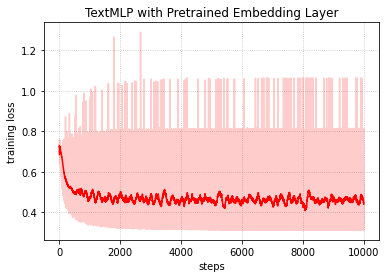

In [12]:
# Author: Xin Xia
# Date: 3/26/2023
##################################
# Use Pretrained Embedding Layer #
##################################
# Load the training and test data
use_pretrained = True  # the flag that controls if the model uses an pretrained embedding layer from BERT or not
model = select_embedding_layer(use_pretrained) # Create the model instance from TextMLP() object
optimizer = torch.optim.AdamW(model.parameters(), lr= learning_rate)  # optimizer used in model training 
print("\n####### Training a Model with Pretrained Embedding Layer ######\n")

# model training 
trained_model, loss_list_pre = train_model(model, loss_function, optimizer, train_dataset, num_epochs, device, batch_size)
# evaluation 
evaluate(trained_model, loss_function, optimizer, test_dataset, 1, device, batch_size)
# training loss
plot_loss(loss_list_pre, use_pretrained)


####### Training a Model with Unpretrained Embedding Layer ######



epoch0: 100%|██████████| 200/200 [00:02<00:00, 79.09it/s]


Epoch 1/50 
Train Loss: 0.6800 Acc: 0.6438


epoch1: 100%|██████████| 200/200 [00:03<00:00, 58.76it/s]


Epoch 2/50 
Train Loss: 0.6530 Acc: 0.8213


epoch2: 100%|██████████| 200/200 [00:03<00:00, 60.46it/s]


Epoch 3/50 
Train Loss: 0.6310 Acc: 0.8488


epoch3: 100%|██████████| 200/200 [00:02<00:00, 84.67it/s]


Epoch 4/50 
Train Loss: 0.6121 Acc: 0.8513


epoch4: 100%|██████████| 200/200 [00:02<00:00, 85.05it/s]


Epoch 5/50 
Train Loss: 0.5943 Acc: 0.8525


epoch5: 100%|██████████| 200/200 [00:02<00:00, 84.97it/s]


Epoch 6/50 
Train Loss: 0.5788 Acc: 0.8525


epoch6: 100%|██████████| 200/200 [00:02<00:00, 84.97it/s]


Epoch 7/50 
Train Loss: 0.5694 Acc: 0.8538


epoch7: 100%|██████████| 200/200 [00:02<00:00, 81.67it/s]


Epoch 8/50 
Train Loss: 0.5571 Acc: 0.8538


epoch8: 100%|██████████| 200/200 [00:02<00:00, 81.21it/s]


Epoch 9/50 
Train Loss: 0.5480 Acc: 0.8538


epoch9: 100%|██████████| 200/200 [00:02<00:00, 84.41it/s]


Epoch 10/50 
Train Loss: 0.5396 Acc: 0.8538


epoch10: 100%|██████████| 200/200 [00:02<00:00, 84.60it/s]


Epoch 11/50 
Train Loss: 0.5332 Acc: 0.8538


epoch11: 100%|██████████| 200/200 [00:02<00:00, 85.48it/s]


Epoch 12/50 
Train Loss: 0.5259 Acc: 0.8538


epoch12: 100%|██████████| 200/200 [00:02<00:00, 85.48it/s]


Epoch 13/50 
Train Loss: 0.5206 Acc: 0.8538


epoch13: 100%|██████████| 200/200 [00:02<00:00, 82.73it/s]


Epoch 14/50 
Train Loss: 0.5159 Acc: 0.8538


epoch14: 100%|██████████| 200/200 [00:02<00:00, 82.68it/s]


Epoch 15/50 
Train Loss: 0.5121 Acc: 0.8538


epoch15: 100%|██████████| 200/200 [00:02<00:00, 84.82it/s]


Epoch 16/50 
Train Loss: 0.5079 Acc: 0.8538


epoch16: 100%|██████████| 200/200 [00:02<00:00, 85.56it/s]


Epoch 17/50 
Train Loss: 0.5038 Acc: 0.8538


epoch17: 100%|██████████| 200/200 [00:02<00:00, 84.91it/s]


Epoch 18/50 
Train Loss: 0.5032 Acc: 0.8538


epoch18: 100%|██████████| 200/200 [00:02<00:00, 84.90it/s]


Epoch 19/50 
Train Loss: 0.5010 Acc: 0.8538


epoch19: 100%|██████████| 200/200 [00:02<00:00, 81.64it/s]


Epoch 20/50 
Train Loss: 0.4966 Acc: 0.8538


epoch20: 100%|██████████| 200/200 [00:02<00:00, 82.37it/s]


Epoch 21/50 
Train Loss: 0.4949 Acc: 0.8538


epoch21: 100%|██████████| 200/200 [00:02<00:00, 84.86it/s]


Epoch 22/50 
Train Loss: 0.4920 Acc: 0.8538


epoch22: 100%|██████████| 200/200 [00:02<00:00, 85.54it/s]


Epoch 23/50 
Train Loss: 0.4899 Acc: 0.8538


epoch23: 100%|██████████| 200/200 [00:02<00:00, 84.74it/s]


Epoch 24/50 
Train Loss: 0.4878 Acc: 0.8538


epoch24: 100%|██████████| 200/200 [00:02<00:00, 84.69it/s]


Epoch 25/50 
Train Loss: 0.4861 Acc: 0.8538


epoch25: 100%|██████████| 200/200 [00:02<00:00, 81.39it/s]


Epoch 26/50 
Train Loss: 0.4855 Acc: 0.8538


epoch26: 100%|██████████| 200/200 [00:02<00:00, 83.04it/s]


Epoch 27/50 
Train Loss: 0.4834 Acc: 0.8538


epoch27: 100%|██████████| 200/200 [00:02<00:00, 85.05it/s]


Epoch 28/50 
Train Loss: 0.4817 Acc: 0.8538


epoch28: 100%|██████████| 200/200 [00:02<00:00, 84.71it/s]


Epoch 29/50 
Train Loss: 0.4796 Acc: 0.8538


epoch29: 100%|██████████| 200/200 [00:02<00:00, 85.35it/s]


Epoch 30/50 
Train Loss: 0.4794 Acc: 0.8538


epoch30: 100%|██████████| 200/200 [00:02<00:00, 85.07it/s]


Epoch 31/50 
Train Loss: 0.4779 Acc: 0.8538


epoch31: 100%|██████████| 200/200 [00:02<00:00, 82.12it/s]


Epoch 32/50 
Train Loss: 0.4768 Acc: 0.8538


epoch32: 100%|██████████| 200/200 [00:02<00:00, 82.50it/s]


Epoch 33/50 
Train Loss: 0.4757 Acc: 0.8538


epoch33: 100%|██████████| 200/200 [00:02<00:00, 85.44it/s]


Epoch 34/50 
Train Loss: 0.4756 Acc: 0.8538


epoch34: 100%|██████████| 200/200 [00:02<00:00, 84.92it/s]


Epoch 35/50 
Train Loss: 0.4751 Acc: 0.8538


epoch35: 100%|██████████| 200/200 [00:02<00:00, 85.36it/s]


Epoch 36/50 
Train Loss: 0.4737 Acc: 0.8538


epoch36: 100%|██████████| 200/200 [00:02<00:00, 85.08it/s]


Epoch 37/50 
Train Loss: 0.4736 Acc: 0.8538


epoch37: 100%|██████████| 200/200 [00:02<00:00, 80.97it/s]


Epoch 38/50 
Train Loss: 0.4717 Acc: 0.8538


epoch38: 100%|██████████| 200/200 [00:02<00:00, 82.84it/s]


Epoch 39/50 
Train Loss: 0.4713 Acc: 0.8538


epoch39: 100%|██████████| 200/200 [00:02<00:00, 85.13it/s]


Epoch 40/50 
Train Loss: 0.4704 Acc: 0.8538


epoch40: 100%|██████████| 200/200 [00:02<00:00, 84.53it/s]


Epoch 41/50 
Train Loss: 0.4708 Acc: 0.8538


epoch41: 100%|██████████| 200/200 [00:02<00:00, 85.27it/s]


Epoch 42/50 
Train Loss: 0.4700 Acc: 0.8538


epoch42: 100%|██████████| 200/200 [00:02<00:00, 85.13it/s]


Epoch 43/50 
Train Loss: 0.4689 Acc: 0.8538


epoch43: 100%|██████████| 200/200 [00:02<00:00, 80.85it/s]


Epoch 44/50 
Train Loss: 0.4685 Acc: 0.8538


epoch44: 100%|██████████| 200/200 [00:02<00:00, 81.97it/s]


Epoch 45/50 
Train Loss: 0.4677 Acc: 0.8538


epoch45: 100%|██████████| 200/200 [00:02<00:00, 84.92it/s]


Epoch 46/50 
Train Loss: 0.4673 Acc: 0.8538


epoch46: 100%|██████████| 200/200 [00:02<00:00, 84.77it/s]


Epoch 47/50 
Train Loss: 0.4670 Acc: 0.8538


epoch47: 100%|██████████| 200/200 [00:02<00:00, 84.79it/s]


Epoch 48/50 
Train Loss: 0.4674 Acc: 0.8538


epoch48: 100%|██████████| 200/200 [00:02<00:00, 84.77it/s]


Epoch 49/50 
Train Loss: 0.4666 Acc: 0.8538


epoch49: 100%|██████████| 200/200 [00:02<00:00, 82.31it/s]


Epoch 50/50 
Train Loss: 0.4658 Acc: 0.8538


100%|██████████| 50/50 [00:00<00:00, 1115.41it/s]


Val Loss: 0.5540 Acc: 0.7600


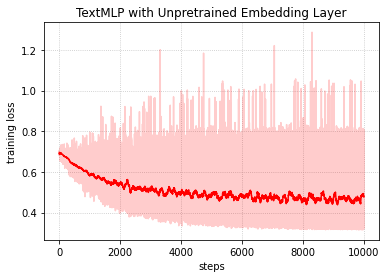

In [13]:
# Author: Xin Xia
# Date: 3/26/2023
##################################
#  Unpretrained Embedding Layer  #
##################################
use_pretrained = False  # the flag that controls if the model uses an pretrained embedding layer from BERT or not
model = select_embedding_layer(use_pretrained) # Create the model instance from TextMLP() object
optimizer = torch.optim.AdamW(model.parameters(), lr= learning_rate)  # optimizer used in model training 
print("\n####### Training a Model with Unpretrained Embedding Layer ######\n")

# model training 
trained_model, loss_list_un = train_model(model, loss_function, optimizer, train_dataset, num_epochs, device, batch_size)
# evaluation 
evaluate(trained_model, loss_function, optimizer, test_dataset, 1, device, batch_size)
# training loss
plot_loss(loss_list_un, use_pretrained)

Based on the training curve, it can be observed that the training loss in both TextMLP models gradually decreases and ultimately converges at a stable value. Thus, it can be concluded that the binary text classifier has achieved a stable stage. Generally, the model with a pretrained embedding layer converges faster using fewer steps, while the one with an unpretrained embedding layer requires less time to train due to its fewer parameters.

However, it should be noted that the model's performance is affected by the split of the training and test dataset. Changing the "seed" of load_data() can cause the training accuracy to fluctuate. In some cases, the test accuracy even appears to be higher than the training accuracy, which may be attributed to the simple filling strategy of NaN values in the raw tabular. In other words, the filled dataframe is still uneven, indicating that designing better filling strategies for NaN values could be a promising direction for improvements.